# Natural Resource Protection & Child Health Indicators
***

## DATA SET
#### 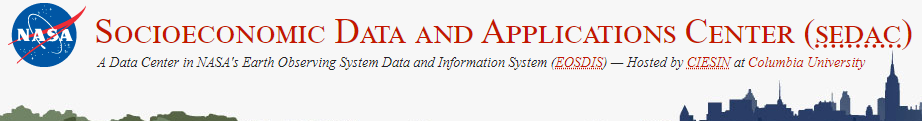
> #### Source & Citation: 
Center for International Earth Science Information Network - CIESIN - Columbia University. 2019. Natural Resource Protection and Child Health Indicators, 2019 Release. Palisades, NY: NASA Socioeconomic Data and Applications Center (SEDAC). https://doi.org/10.7927/r6mv-sv82. Accessed 16 OCTOBER 2020.

> ####  Abstract:
"The Natural Resource Protection and Child Health Indicators, 2019 Release, is produced in support of the U.S. Millennium Challenge Corporation (MCC) as selection criteria for funding eligibility. The Natural Resource Protection Indicator (NRPI) and Child Health Indicator (CHI) are based on proximity-to-target scores ranging from 0 to 100 (at target). The NRPI covers 234 countries and is calculated based on the weighted average percentage of biomes under protected status. The CHI is a composite index for 195 countries derived from the average of three proximity-to-target scores for access to at least basic water and sanitation, along with child mortality. The 2019 release includes a consistent time series of NRPI scores for 2015 to 2019 and CHI scores for 2010 to 2018."

> ###  Data Descriptions:
> ####  SEDAC Data:
1. **NRPI_v2019_xx:** The Natural Resource Protection Indicator is the proximity to target of 17% protection across all biomes on a 0-100 scale (2019 release).100 corresponds to 17% protection across all biomes, and 0 corresponds to zero protection.
2. **cmr_xx:** Deaths of children age 1 to exact age 5 per 1,000 live births in that year (4q1)
3. **wat_xx:** water (raw and proximity to target), 0-100 scale
4. **san_xx:** sanitation (raw and proximity to target), 0-100 scale
5. **chmort_pt_xx:** Probability of dying between age 1 and 5 (4q1) (expressed in chances out of 1,000)
6. **CHI_v2019_xx:** Child Health Indicator, unweighted average of three proximity to target indicators - water, sanitation, and mortality (2019 release)
> ####  United Nations Department of Economic and Social Affairs Statistics Grouping by ISO3:
7. Region Name
8. Sub-region Name 

> ### Millennium Challenge Corporation Initiatives: https://www.mcc.gov/initiatives
> #### Initiatives Addressed in Analysis (Results below)
> 1. **Aid Effectiveness:** Region & Sub-Region, where do Child Health Indicators have the lowest 3 year mean?
> 2. **Climate-Resilient Development:** Where can relationships be identified between Natural Resource Protection & Child Health?
> 3. **Country-Led Poverty Reduction:** Which countries show significant relationships for inferces on future MCC funding?



# DATA PREP
> #### Steps to clean/reshape/enrich data

In [1]:
# import libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import requests
from requests.auth import HTTPBasicAuth
import zipfile
import urllib.request
import shutil

In [2]:
# pass credentials to access zipped file to read excel within folder - in progress
# files = 'nrpi-chi-2019-xlsx.zip'
# r = requests.get('https://sedac.ciesin.columbia.edu/downloads/data/nrmi/nrmi-natural-resource-protection-child-health-indicators-2019/nrpi-chi-2019-xlsx.zip', auth=HTTPBasicAuth('moon.a', 'H%zqhf7z*qNgw2i'))
# print(r.ok)
# files = 'nrpi-chi-2019-xlsx.zip'
# if r.ok:
# with zipfile.ZipFile(files) as zf:
#        zf.extractall()

True


In [3]:
# bring in Natural Resource Protection Indicator (NRPI) data
resources_df = pd.read_excel('http://atxmoon.com/cv/assets/custom/data/resource-health-indicators.xlsx', sheet_name='NRPI_2019')
resources_df.head(2)

,ISO3,CountryName,NRPI_v2019_15,NRPI_v2019_16,NRPI_v2019_17,NRPI_v2019_18,NRPI_v2019_19
0,ABW,Aruba,58.964862,58.964862,58.964862,58.964862,58.964862
1,AFG,Afghanistan,0.613273,0.613273,0.613273,0.613273,0.613273


In [4]:
# bring in Child Health Indicator data
child_health_df = pd.read_excel('http://atxmoon.com/cv/assets/custom/data/resource-health-indicators.xlsx', sheet_name='CHI_2019')
child_health_df.head(2)

,ISO3,CountryName,cmr_10,cmr_11,cmr_12,cmr_13,cmr_14,cmr_15,cmr_16,cmr_17,...,chmort_pt_18,CHI_v2019_10,CHI_v2019_11,CHI_v2019_12,CHI_v2019_13,CHI_v2019_14,CHI_v2019_15,CHI_v2019_16,CHI_v2019_17,CHI_v2019_18
0,ABW,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,25.264712,23.732247,22.256063,20.841731,19.48403,18.218624,17.086026,16.050861,...,78.620829,48.949188,50.954385,52.948497,54.929004,56.898474,58.840417,60.735683,62.603587,63.034354


In [5]:
# keep only 2016 forward
child_health_df = child_health_df.drop(columns=['cmr_10', 'cmr_11', 'cmr_12', 'cmr_13', 'cmr_14', 'cmr_15', 'wat_10', 'wat_11', 'wat_12', 'wat_13', 'wat_14', 'wat_15', 'san_10', 'san_11', 'san_12', 'san_13', 'san_14', 'san_15', 'chmort_pt_10', 'chmort_pt_11', 'chmort_pt_12', 'chmort_pt_13', 'chmort_pt_14', 'chmort_pt_15', 'CHI_v2019_10', 'CHI_v2019_11', 'CHI_v2019_12', 'CHI_v2019_13', 'CHI_v2019_14', 'CHI_v2019_15'])

In [6]:
# Join Natural Resource & Child Health data on ISO3
df = resources_df.merge(child_health_df, left_on='ISO3', right_on='ISO3')
df = df.drop(columns=['NRPI_v2019_15'])
df.head(2)

,ISO3,CountryName_x,NRPI_v2019_16,NRPI_v2019_17,NRPI_v2019_18,NRPI_v2019_19,CountryName_y,cmr_16,cmr_17,cmr_18,...,wat_18,san_16,san_17,san_18,chmort_pt_16,chmort_pt_17,chmort_pt_18,CHI_v2019_16,CHI_v2019_17,CHI_v2019_18
0,ABW,Aruba,58.964862,58.964862,58.964862,58.964862,Aruba,NaN,NaN,NaN,...,97.869023,97.543481,97.543481,97.543481,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,0.613273,0.613273,0.613273,0.613273,Afghanistan,17.086026,16.050861,15.135943,...,67.064623,42.054183,43.417610,43.417610,75.866382,77.328529,78.620829,60.735683,62.603587,63.034354


In [7]:
# add column for 3 year CMR mean, WAT mean, SAN mean, CHMORT mean, CHI mean, NRPI mean
col = df.loc[: , "NRPI_v2019_16":"NRPI_v2019_18"]
df['nrpi_mean'] = col.mean(axis=1)
col = df.loc[: , "cmr_16":"cmr_18"]
df['cmr_mean'] = col.mean(axis=1)
col = df.loc[: , "wat_16":"wat_18"]
df['wat_mean'] = col.mean(axis=1)
col = df.loc[: , "san_16":"san_18"]
df['san_mean'] = col.mean(axis=1)
col = df.loc[: , "chmort_pt_16":"chmort_pt_18"]
df['chmort_pt_mean'] = col.mean(axis=1)
col = df.loc[: , "CHI_v2019_16":"CHI_v2019_18"]
df['CHI_mean'] = col.mean(axis=1)
df.head(2)

,ISO3,CountryName_x,NRPI_v2019_16,NRPI_v2019_17,NRPI_v2019_18,NRPI_v2019_19,CountryName_y,cmr_16,cmr_17,cmr_18,...,chmort_pt_18,CHI_v2019_16,CHI_v2019_17,CHI_v2019_18,nrpi_mean,cmr_mean,wat_mean,san_mean,chmort_pt_mean,CHI_mean
0,ABW,Aruba,58.964862,58.964862,58.964862,58.964862,Aruba,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,58.964862,NaN,97.869023,97.543481,NaN,NaN
1,AFG,Afghanistan,0.613273,0.613273,0.613273,0.613273,Afghanistan,17.086026,16.050861,15.135943,...,78.620829,60.735683,62.603587,63.034354,0.613273,16.090943,66.138577,42.963134,77.271913,62.124541


In [8]:
# bring in regional/geographic grouping by ISO3
temp_df = pd.read_csv('https://datahub.io/core/country-codes/r/country-codes.csv')
temp_df.head(2)

,FIFA,Dial,ISO3166-1-Alpha-3,MARC,is_independent,ISO3166-1-numeric,GAUL,FIPS,WMO,ISO3166-1-Alpha-2,...,Sub-region Name,official_name_ru,Global Name,Capital,Continent,TLD,Languages,Geoname ID,CLDR display name,EDGAR
0,TPE,886,TWN,ch,Yes,158.0,925,TW,NaN,TW,...,NaN,NaN,NaN,Taipei,AS,.tw,"zh-TW,zh,nan,hak",1668284.0,Taiwan,NaN
1,AFG,93,AFG,af,Yes,4.0,1,AF,AF,AF,...,Southern Asia,Афганистан,World,Kabul,AS,.af,"fa-AF,ps,uz-AF,tk",1149361.0,Afghanistan,B2


In [9]:
# keep only regional/geographic grouping
temp_df = temp_df[['ISO3166-1-Alpha-3', 'Region Name', 'Sub-region Name']]
temp_df.tail(5)

,ISO3166-1-Alpha-3,Region Name,Sub-region Name
245,ESH,Africa,Northern Africa
246,YEM,Asia,Western Asia
247,ZMB,Africa,Sub-Saharan Africa
248,ZWE,Africa,Sub-Saharan Africa
249,ALA,Europe,Northern Europe


In [10]:
# Join Natural Resource & Child Health data with Country/Regional Grouping on ISO3
df = df.merge(temp_df, left_on='ISO3', right_on='ISO3166-1-Alpha-3')
df.head(2)

,ISO3,CountryName_x,NRPI_v2019_16,NRPI_v2019_17,NRPI_v2019_18,NRPI_v2019_19,CountryName_y,cmr_16,cmr_17,cmr_18,...,CHI_v2019_18,nrpi_mean,cmr_mean,wat_mean,san_mean,chmort_pt_mean,CHI_mean,ISO3166-1-Alpha-3,Region Name,Sub-region Name
0,ABW,Aruba,58.964862,58.964862,58.964862,58.964862,Aruba,NaN,NaN,NaN,...,NaN,58.964862,NaN,97.869023,97.543481,NaN,NaN,ABW,Americas,Latin America and the Caribbean
1,AFG,Afghanistan,0.613273,0.613273,0.613273,0.613273,Afghanistan,17.086026,16.050861,15.135943,...,63.034354,0.613273,16.090943,66.138577,42.963134,77.271913,62.124541,AFG,Asia,Southern Asia


In [11]:
df = df.drop(columns=['CountryName_y', 'ISO3166-1-Alpha-3'])

In [12]:
df.to_excel('output.xlsx')



# DATA VISUALIZATION

## Descriptive Analytics

> #### By Global Region, where are the lowest Child Health Indicators over preceding 3 years?

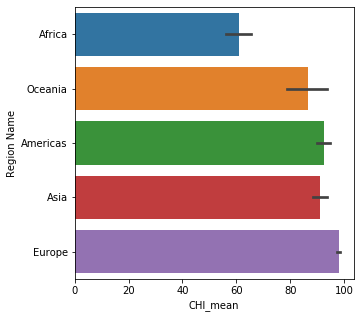

In [13]:
plt.figure(figsize=(5,5))
sns.barplot(x="CHI_mean", y="Region Name", data=df.sort_values("CHI_mean"))

> #### By Sub-Region, where are the lowest Child Health Indicators over preceding 3 years?

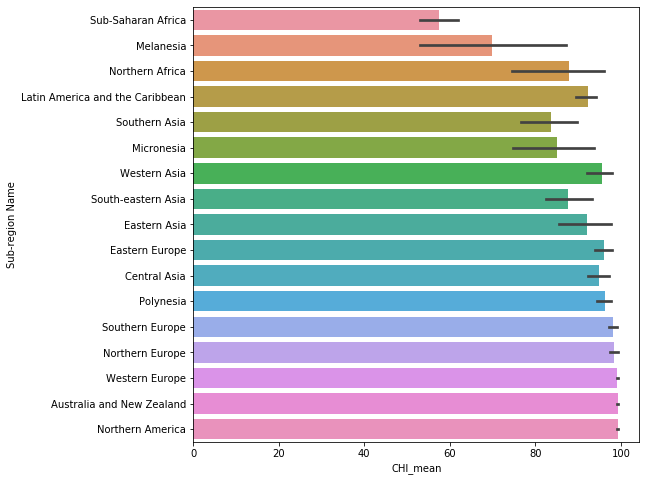

In [14]:
plt.figure(figsize=(8,8))
sns.barplot(x="CHI_mean", y="Sub-region Name", data=df.sort_values("CHI_mean"))

> #### How are Sub-Regional Child Health indicators skewed by outlying countries?

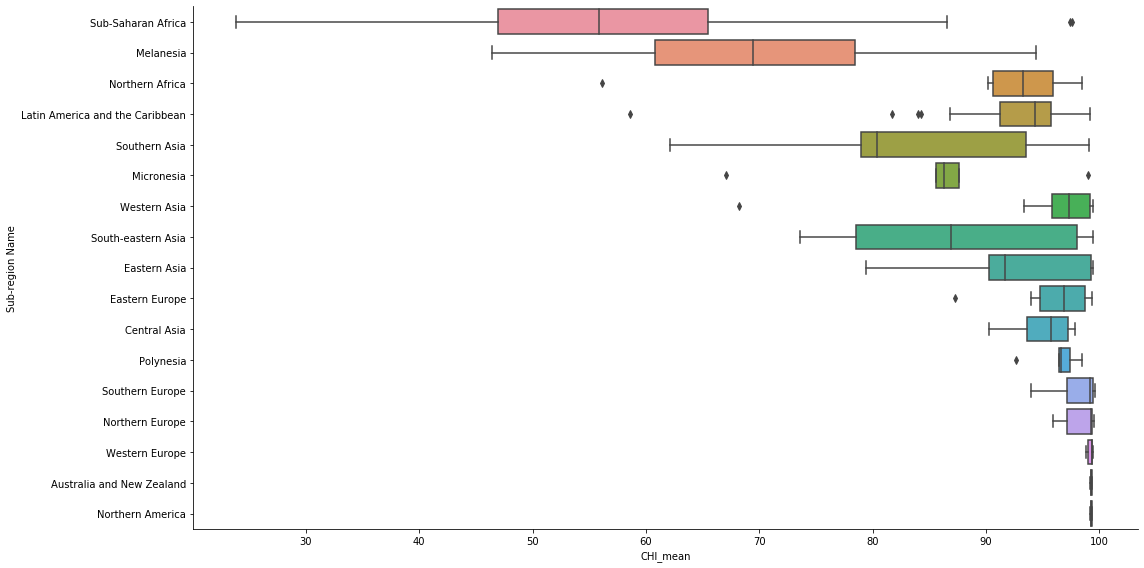

In [15]:
sns.catplot(data=df.sort_values("CHI_mean"), orient="h", kind="box", x="CHI_mean", y="Sub-region Name", height=8, aspect=2)

> ### Within subset, which countries had the lowest CHI in 2018? (most recent year in CHI data)
> **Subset of Low CHI Sub-Regions:** Sub-Saharan Africa, Melanesia, Northern Africa, LATAM, Southern Asia, Micronesia (keeps 6 of 17 Sub-Regions, 55% of full data set)  

In [16]:
# create subset_df with sub regions of focus
subset = ['Sub-Saharan Africa', 'Melanesia', 'Northern Africa', 'Latin America and the Caribbean', 'Southern Asia', 'Micronesia']
subset_df = df.loc[df['Sub-region Name'].isin(subset)]

In [17]:
# create country_subset_df with lowest 2018 CHI
country_subset_df = subset_df.sort_values(by='CHI_v2019_18',ascending=True).head(40)

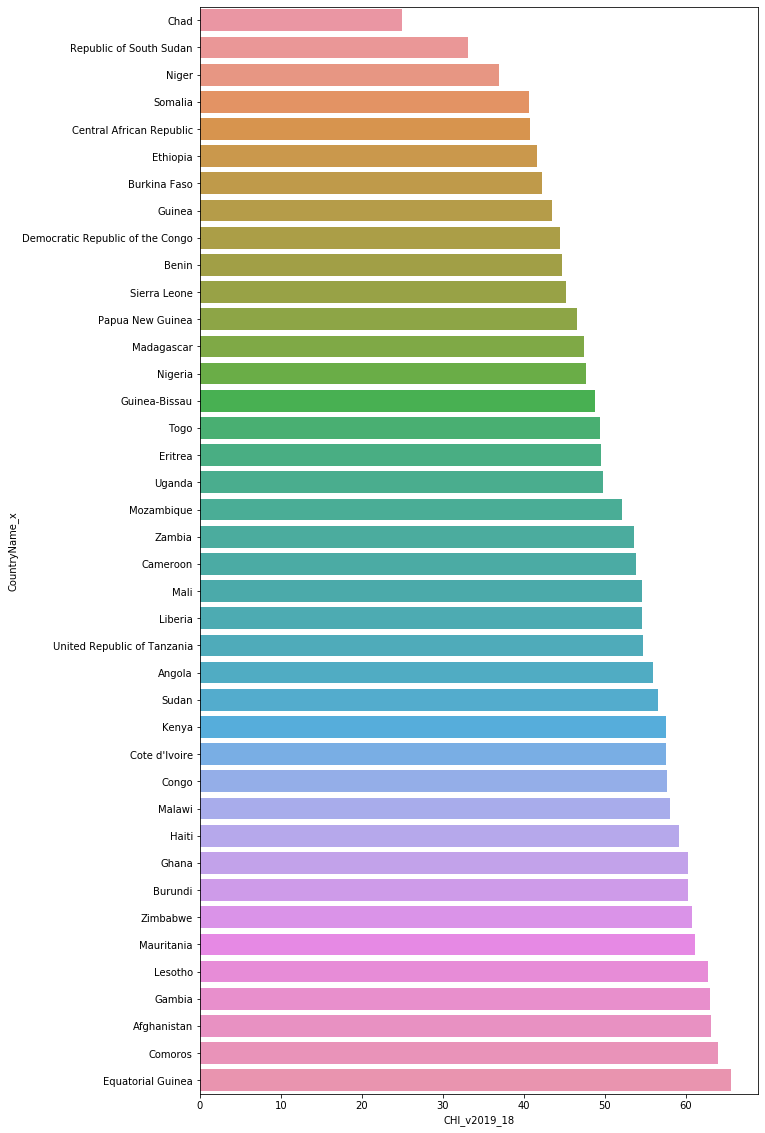

In [18]:
plt.figure(figsize=(10,20))
sns.barplot(x="CHI_v2019_18", y="CountryName_x", data=country_subset_df.sort_values("CHI_v2019_18"))

# Predictive Analytics

> ## Based on 2018 CHI and 2018 NRPI from full data, can we predict future CHI as a function of NRPI?
$$
CHI = \beta * NRPI + \mu
$$

In [19]:
results = smf.ols('CHI_v2019_18 ~ NRPI_v2019_18', data = df).fit()
print(results.params)
results.summary()

Intercept        81.765429
NRPI_v2019_18     0.038538
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           CHI_v2019_18   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9557
Date:                Sun, 25 Oct 2020   Prob (F-statistic):              0.329
Time:                        18:40:41   Log-Likelihood:                -847.29
No. Observations:                 195   AIC:                             1699.
Df Residuals:                     193   BIC:                             1705.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        81.7654      2.965     27.573      0.000      75.917      87.614
NRPI_v2019_18     0.0385      0.039      0.978      0.329      -0.039       0.116
==============================================================================
Omnibus:                       34.929   Durbin-Watson:                   1.675
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.990
Skew:                          -1.222   Prob(JB):                     2.30e-11
Kurtosis:                       3.236   Cond. No.                         166.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> ### Results show a low fit for the model, demonstrated below where there are outlying trends primarily in Africa and Oceania

<Figure size 720x720 with 0 Axes>

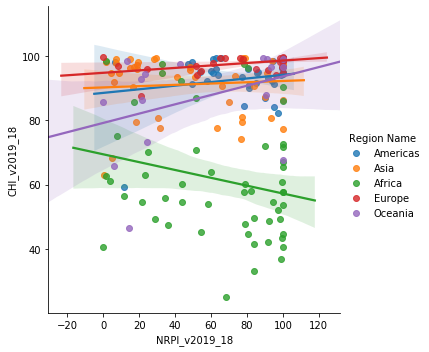

In [20]:
plt.figure(figsize=(10, 10))
sns.lmplot(x="NRPI_v2019_18", y="CHI_v2019_18", hue="Region Name", data=df)

<Figure size 720x720 with 0 Axes>

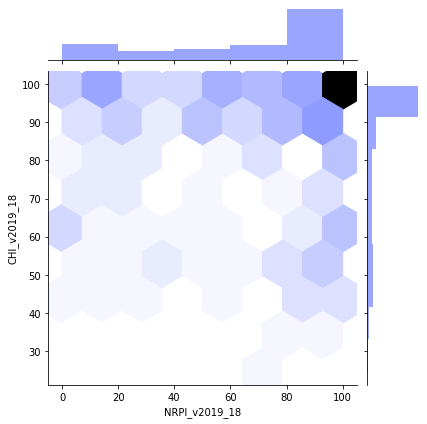

In [21]:
# jointplot with all data
plt.figure(figsize=(10, 10))
sns.jointplot(x="NRPI_v2019_18", y="CHI_v2019_18", kind="hex", color="#001eff", data=df)

> ## Within a subset of 40 countries with lowest 2018 CHI, will the model have a better fit?

In [22]:
results = smf.ols('CHI_v2019_18 ~ NRPI_v2019_18', data = country_subset_df).fit()
print(results.params)
results.summary()

Intercept        55.965792
NRPI_v2019_18    -0.068985
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           CHI_v2019_18   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     2.921
Date:                Sun, 25 Oct 2020   Prob (F-statistic):             0.0956
Time:                        18:41:23   Log-Likelihood:                -143.65
No. Observations:                  40   AIC:                             291.3
Df Residuals:                      38   BIC:                             294.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        55.9658      2.931     19.097      0.000      50.033      61.898
NRPI_v2019_18    -0.0690      0.040     -1.709      0.096      -0.151       0.013
==============================================================================
Omnibus:                        4.866   Durbin-Watson:                   0.162
Prob(Omnibus):                  0.088   Jarque-Bera (JB):                3.637
Skew:                          -0.699   Prob(JB):                        0.162
Kurtosis:                       3.475   Cond. No.                         149.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
# describe 2018 series from countries within subset 
info = country_subset_df.drop(columns=['NRPI_v2019_16', 'NRPI_v2019_17', 'NRPI_v2019_19', 'cmr_16', 'cmr_17', 'wat_16', 'wat_17', 'san_16', 'san_17', 'chmort_pt_16', 'chmort_pt_17', 'CHI_v2019_16', 'CHI_v2019_17', 'Region Name', 'Sub-region Name', 'nrpi_mean', 'cmr_mean', 'wat_mean', 'san_mean', 'chmort_pt_mean', 'CHI_mean']) 
info.describe()

,NRPI_v2019_18,cmr_18,wat_18,san_18,chmort_pt_18,CHI_v2019_18
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,63.459523,23.873641,60.612915,27.872223,66.279032,51.588057
std,35.735854,10.925991,11.561526,13.517787,15.432711,9.226447
min,0.000000,10.234822,38.700599,7.316333,27.664686,24.902590
25%,32.798676,16.018090,52.289571,16.843368,59.182601,45.098953
50%,78.831768,20.206449,60.818768,26.298133,71.458857,53.707576
75%,97.790246,28.897745,68.695422,38.521173,77.374817,58.301447
max,100.000000,51.211677,81.453390,66.312790,85.543550,65.597972


<Figure size 720x720 with 0 Axes>

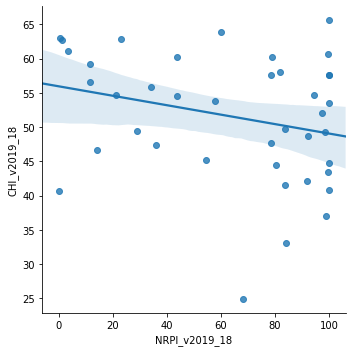

In [24]:
# trend from subset of 40 countries
plt.figure(figsize=(10, 10))
sns.lmplot(x="NRPI_v2019_18", y="CHI_v2019_18", data=country_subset_df)

<Figure size 720x720 with 0 Axes>

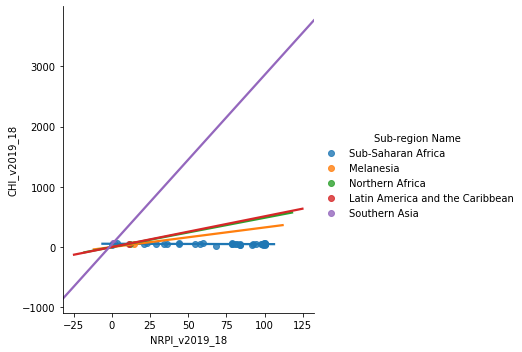

In [25]:
# trend from subset of 40 countries by sub-region
plt.figure(figsize=(10, 10))
sns.lmplot(x="NRPI_v2019_18", y="CHI_v2019_18", hue="Sub-region Name", data=country_subset_df)

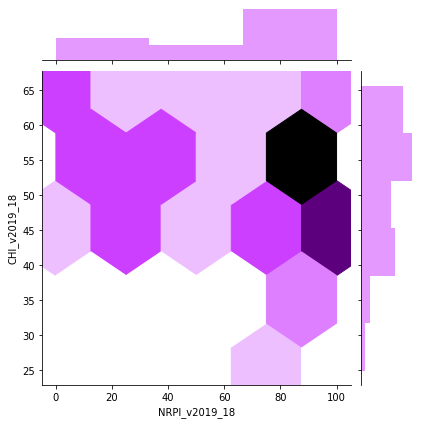

In [26]:
# jointplot with subset data
sns.jointplot(x="NRPI_v2019_18", y="CHI_v2019_18", kind="hex", color="#bd00ff", data=country_subset_df)

### Within the subset of countries, are there significant outliers or trends in other dimensions of 2018 data? 

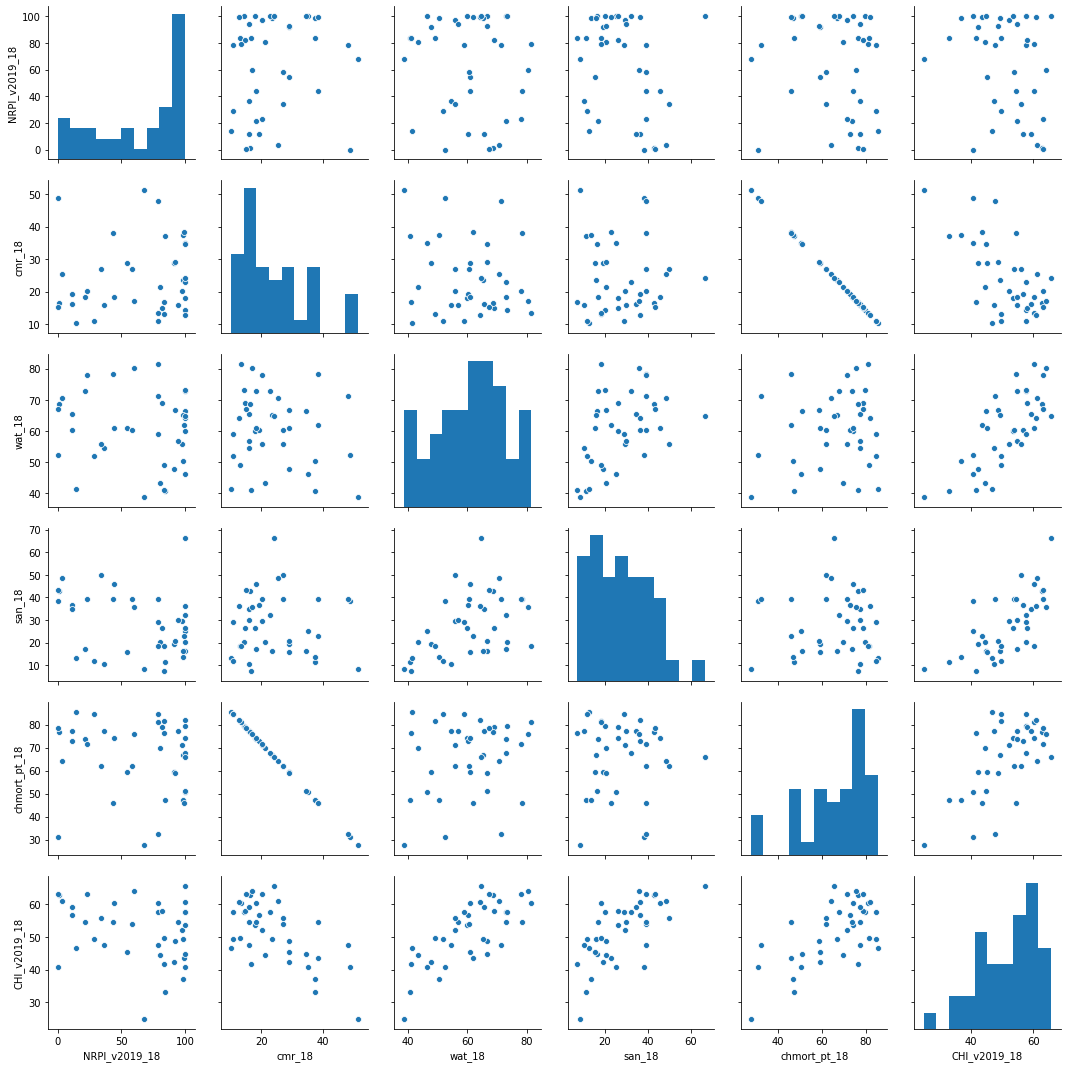

In [27]:
# show relationships between 2018 series from countries within subset
sns.pairplot(info)

# CITATIONS
> ### Natural Resource & Child Health Indicators
> Center for International Earth Science Information Network (CIESIN), Columbia University. 2019. Natural Resource Protection and Child Health Indicators, 2019 Release. Palisades, NY: NASA Socioeconomic Data and Applications Center. https://doi.org/10.7927/r6mv-sv82. Accessed 16 OCT 2020.

> ### Regional Country Grouping Data
> Datahub. 2020. Comprehensive Country Codes, https://datahub.io/core/country-codes. Accessed 16 OCT 2020.